In [1]:
import torch as torch
import pandas as pd
import numpy as np
import math
from sklearn import preprocessing
from neuralnetwork import *
from reading import *
from ADDA_Perso.ADDA import *
from ADDA_Perso.Discri_Baseline import *
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import umap

torch.cuda.set_device(1)
device = ("cuda:1" if torch.cuda.is_available() else"cpu")
print(f"Using {device} from {torch.cuda.get_device_name()}")

dataCell = domain_selection(2)
print("_________________________")
dataPatient = domain_selection(3)
print("_________________________")
cellDataloaders, input_dim, datasetCell = arrange_data_into_dataloaders(dataCell,base_bs=32, device = device)
#cellDataloadersExtractor, input_dim = arrange_data_into_dataloaders(dataCell)
print("_________________________")
patientDataloaders, input_dim, datasetPatient = arrange_data_into_dataloaders(dataPatient,base_bs=32, device = device)
output_dim = 1

2023-06-19 11:27:01.414807: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-19 11:27:03.630408: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-06-19 11:27:03.630567: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-06-19 11:27:03.630578: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like t

Using cuda:1 from NVIDIA GeForce RTX 2080 Ti
Selection Cell domain source
All done
Name of the variable containing all cell data : cell_data
6643
_________________________
Selection Patient domain source
All done
Name of the variable containing all the data : Patient_data
21244
_________________________
_________________________


In [2]:
name="logger/logger_baseline_middle_Cell_to_Patient_500_batch_size32_noL2_noL1_noweightdecay_lr1e-4_dropout_var"
logger = LogBaseline(name)

6643 elements in the dataset
4649 elements in trainset
997 elements in valset
997 elements in testset
21244 elements in the dataset
14870 elements in trainset
3187 elements in valset
3187 elements in testset


100%|█████████▉| 499/500 [10:03<00:01,  1.10s/it]

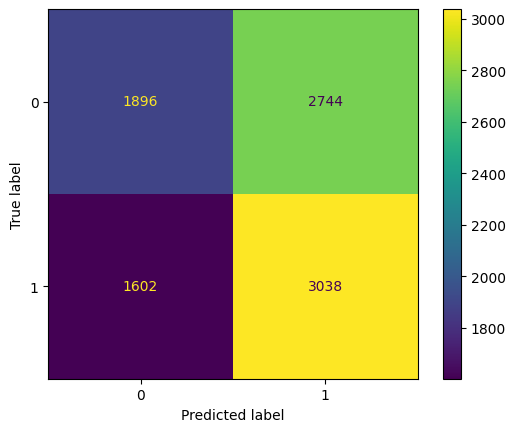

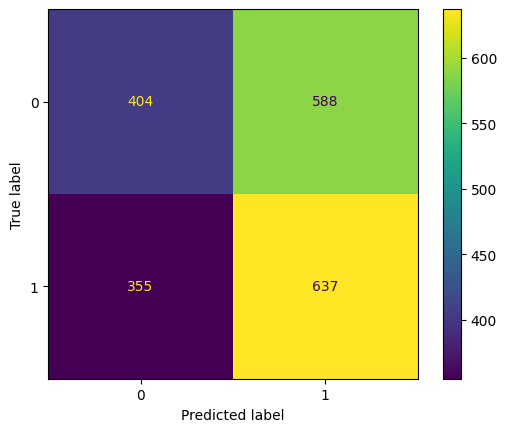

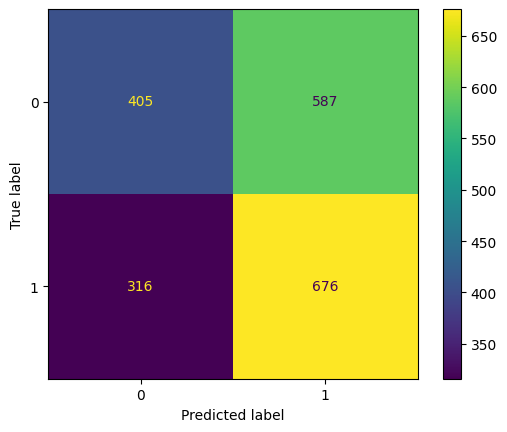

100%|██████████| 500/500 [10:06<00:00,  1.21s/it]


6643 elements in the dataset
4649 elements in trainset
997 elements in valset
997 elements in testset
21244 elements in the dataset
14870 elements in trainset
3187 elements in valset
3187 elements in testset


100%|█████████▉| 499/500 [10:27<00:01,  1.31s/it]

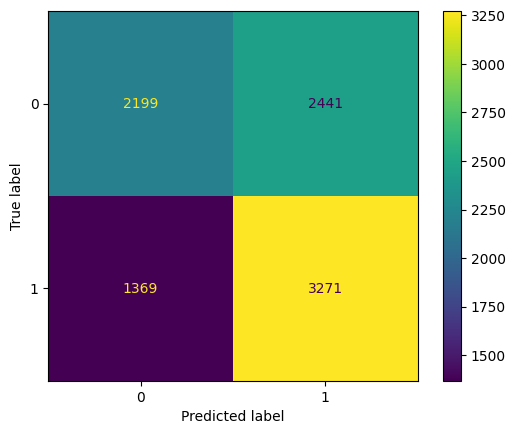

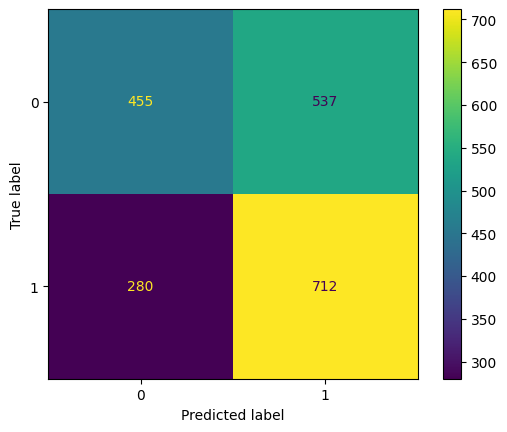

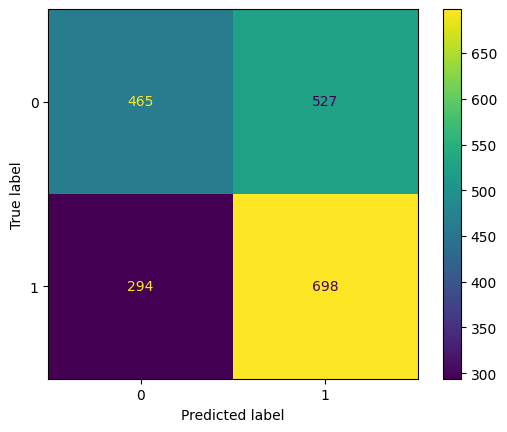

100%|██████████| 500/500 [10:29<00:00,  1.26s/it]


6643 elements in the dataset
4649 elements in trainset
997 elements in valset
997 elements in testset
21244 elements in the dataset
14870 elements in trainset
3187 elements in valset
3187 elements in testset


100%|█████████▉| 499/500 [10:32<00:01,  1.16s/it]

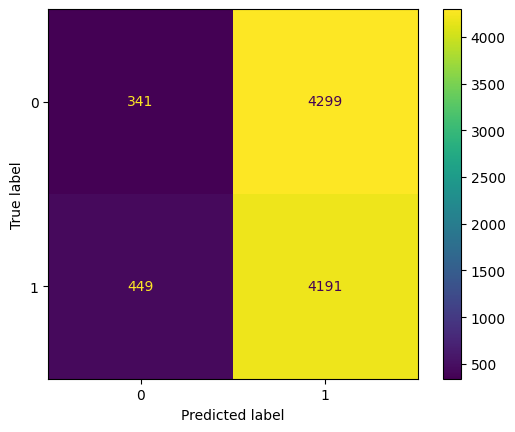

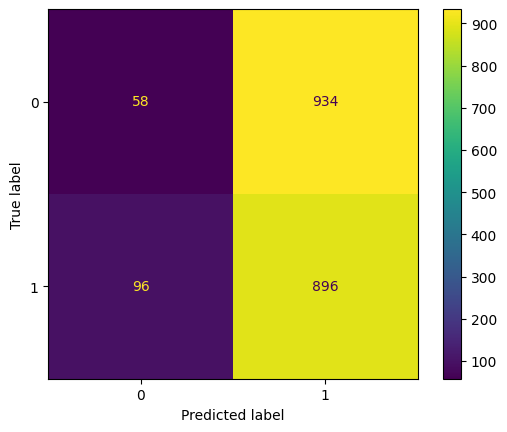

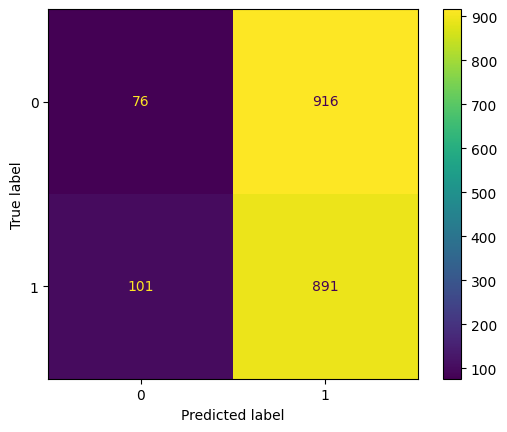

100%|██████████| 500/500 [10:35<00:00,  1.27s/it]


6643 elements in the dataset
4649 elements in trainset
997 elements in valset
997 elements in testset
21244 elements in the dataset
14870 elements in trainset
3187 elements in valset
3187 elements in testset


100%|█████████▉| 499/500 [10:37<00:01,  1.27s/it]

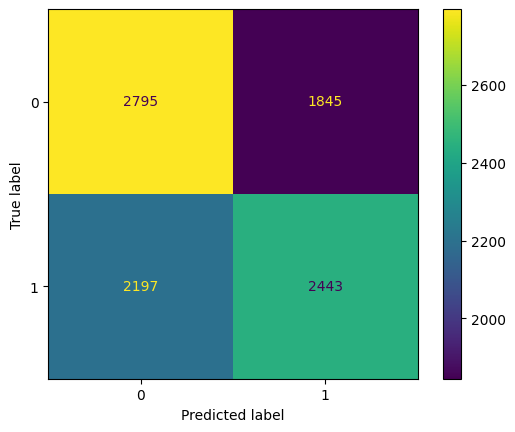

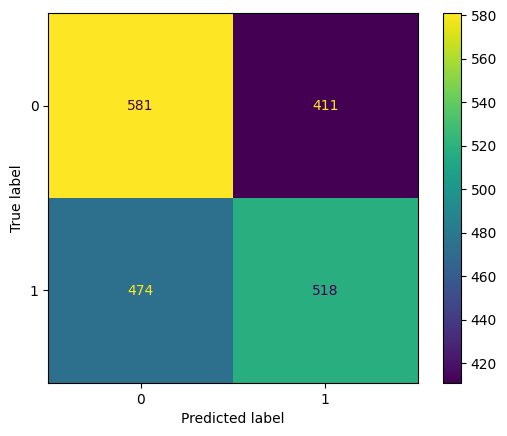

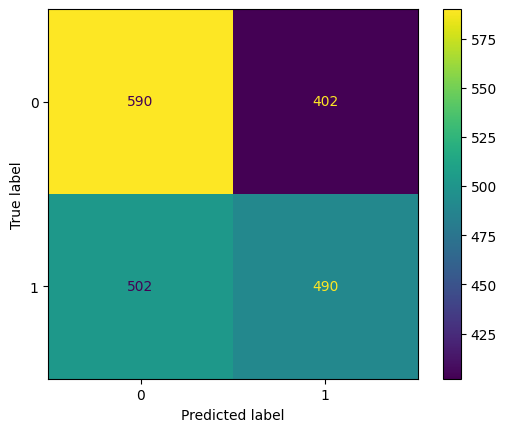

100%|██████████| 500/500 [10:40<00:00,  1.28s/it]


6643 elements in the dataset
4649 elements in trainset
997 elements in valset
997 elements in testset
21244 elements in the dataset
14870 elements in trainset
3187 elements in valset
3187 elements in testset


100%|█████████▉| 499/500 [10:40<00:01,  1.17s/it]

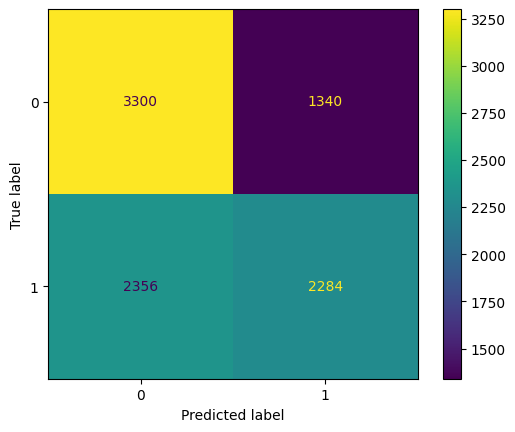

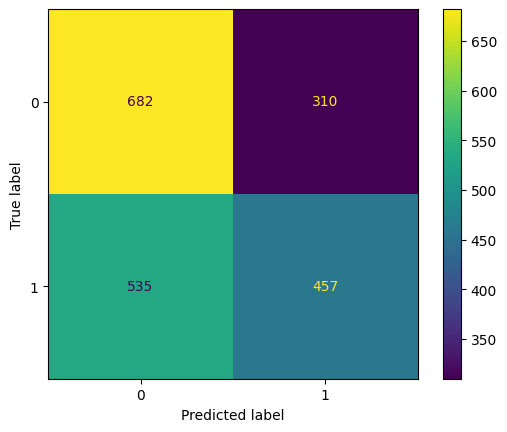

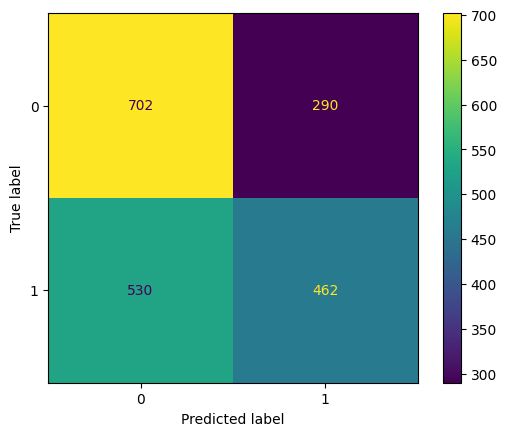

100%|██████████| 500/500 [10:44<00:00,  1.29s/it]


6643 elements in the dataset
4649 elements in trainset
997 elements in valset
997 elements in testset
21244 elements in the dataset
14870 elements in trainset
3187 elements in valset
3187 elements in testset


100%|█████████▉| 499/500 [10:45<00:01,  1.27s/it]

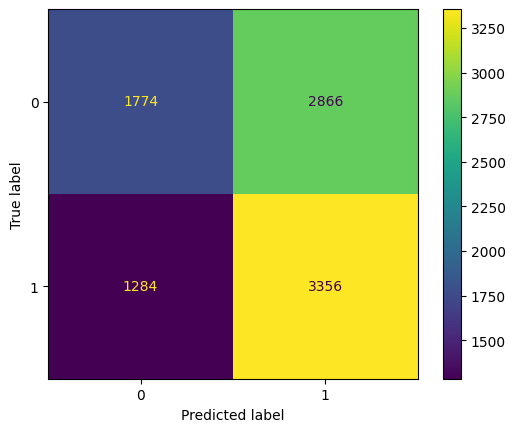

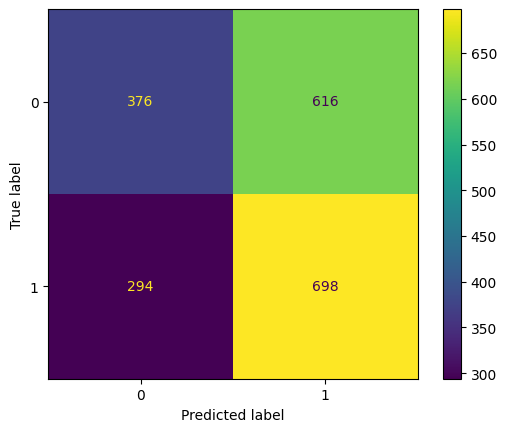

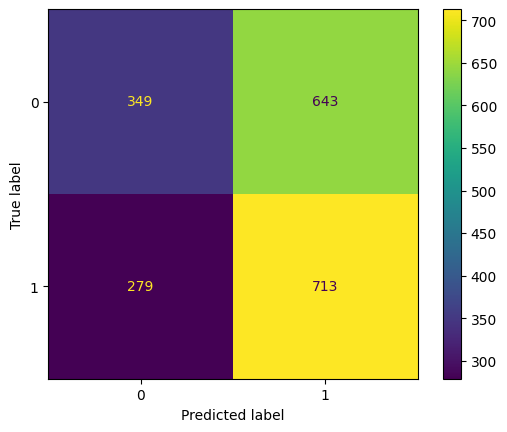

100%|██████████| 500/500 [10:48<00:00,  1.30s/it]


6643 elements in the dataset
4649 elements in trainset
997 elements in valset
997 elements in testset
21244 elements in the dataset
14870 elements in trainset
3187 elements in valset
3187 elements in testset


100%|█████████▉| 499/500 [10:47<00:01,  1.19s/it]

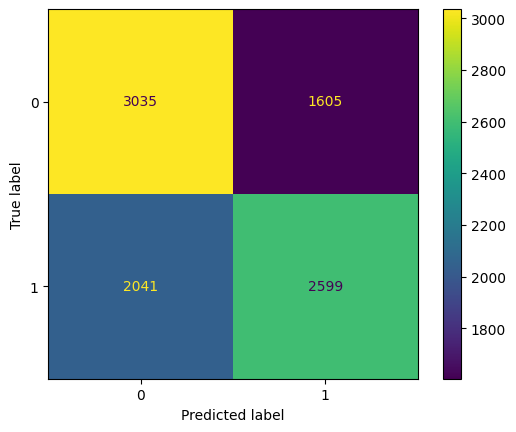

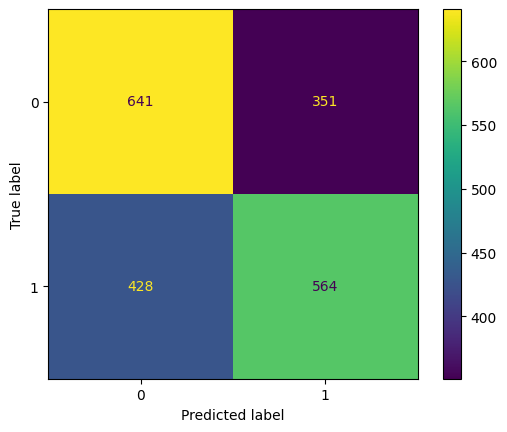

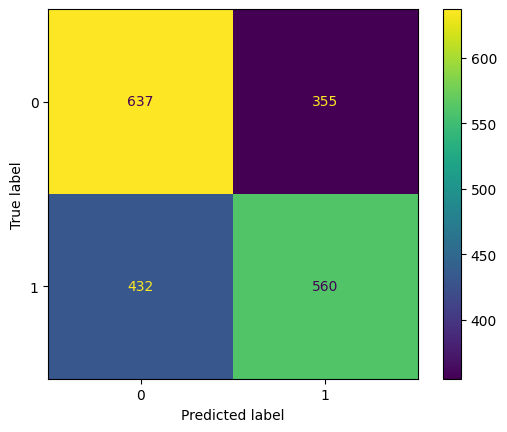

100%|██████████| 500/500 [10:51<00:00,  1.30s/it]


6643 elements in the dataset
4649 elements in trainset
997 elements in valset
997 elements in testset
21244 elements in the dataset
14870 elements in trainset
3187 elements in valset
3187 elements in testset


100%|█████████▉| 499/500 [10:51<00:01,  1.30s/it]

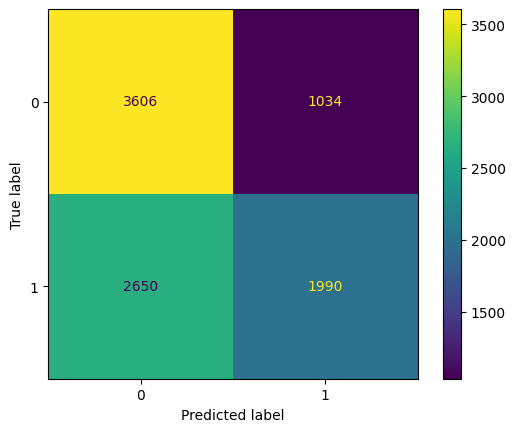

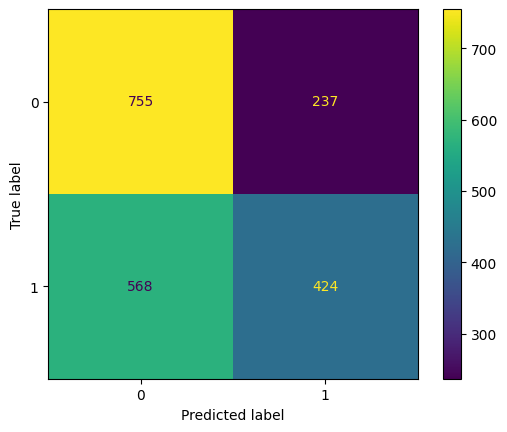

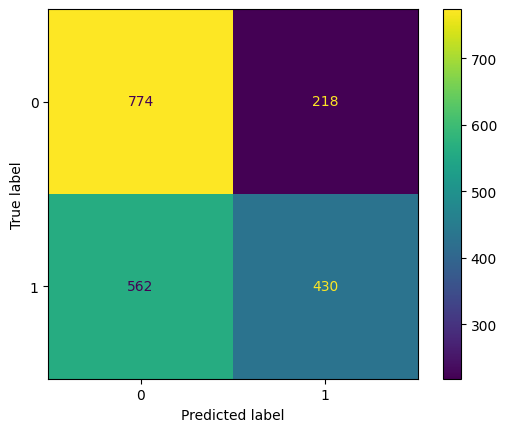

100%|██████████| 500/500 [10:54<00:00,  1.31s/it]


6643 elements in the dataset
4649 elements in trainset
997 elements in valset
997 elements in testset
21244 elements in the dataset
14870 elements in trainset
3187 elements in valset
3187 elements in testset


100%|█████████▉| 499/500 [10:52<00:01,  1.20s/it]

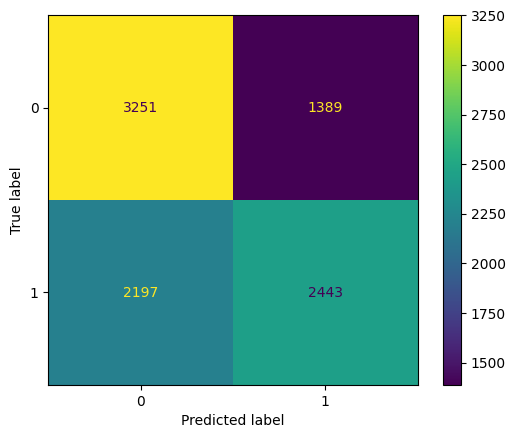

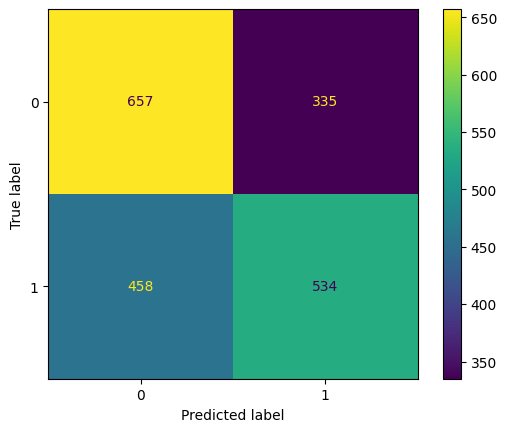

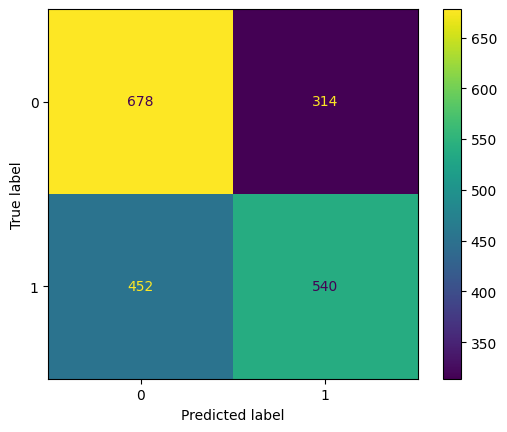

100%|██████████| 500/500 [10:55<00:00,  1.31s/it]


6643 elements in the dataset
4649 elements in trainset
997 elements in valset
997 elements in testset
21244 elements in the dataset
14870 elements in trainset
3187 elements in valset
3187 elements in testset


100%|█████████▉| 499/500 [10:55<00:01,  1.30s/it]

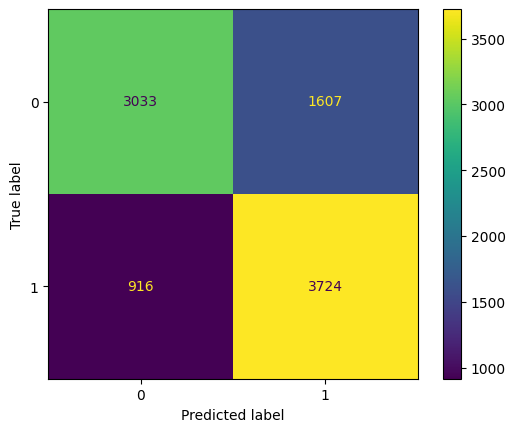

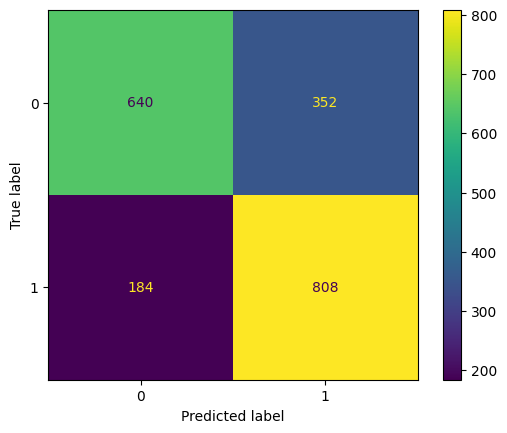

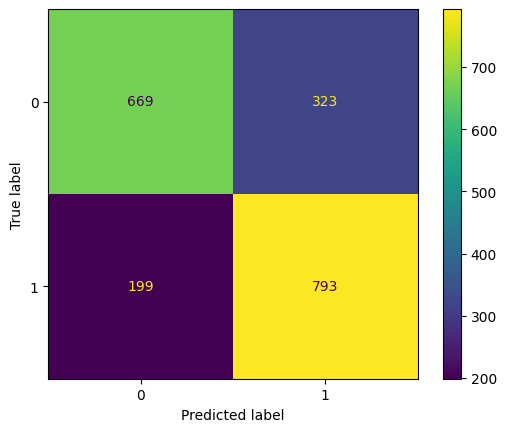

100%|██████████| 500/500 [10:58<00:00,  1.32s/it]

CPU times: user 1h 45min 53s, sys: 1min 8s, total: 1h 47min 2s
Wall time: 1h 47min 7s


In [3]:
%%time
for k in range(10):
    cellDataloaders, input_dim = use_dataset(datasetCell,base_bs=32)
    patientDataloaders, input_dim = use_dataset(datasetPatient,base_bs=32)
    baseline_net = Baseline_middle(input_dim).to(device)

    domain_baseline_train(
        baseline_net, 
        500, 
        cellDataloaders, 
        patientDataloaders, 
        1500, 
        20, 
        150,
        1e-4,
        1e-3, 
        1e-3, 
        device, 
        logger, 
        False,
        False,
        False,
        False)

In [7]:
df_results = pd.read_csv("logger/logger_baseline_Cell_to_Patient_500_batch_size32_L21e-3_L11e-3_noweightdecay_lr1e-4_dropout.csv")

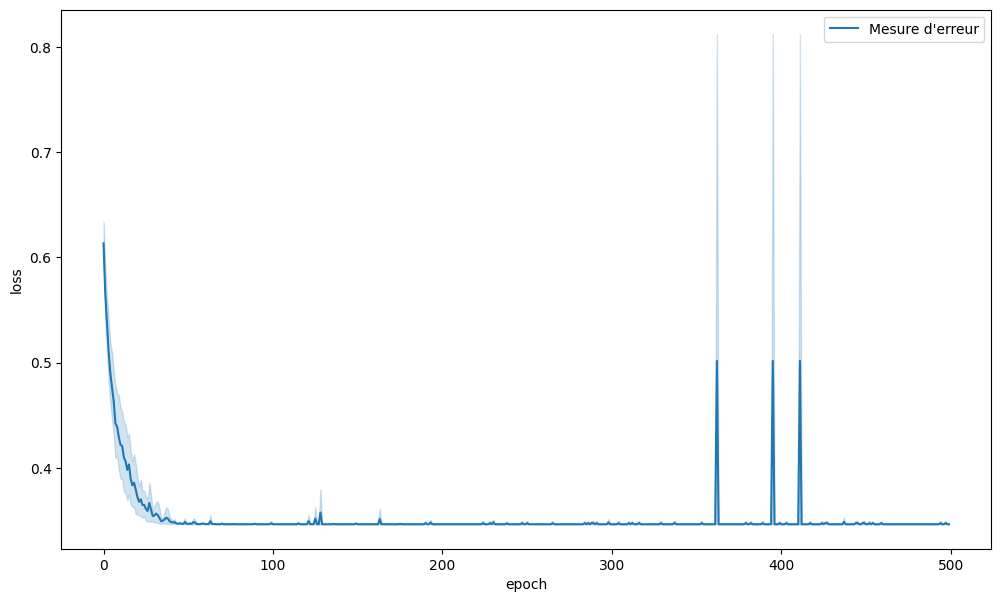

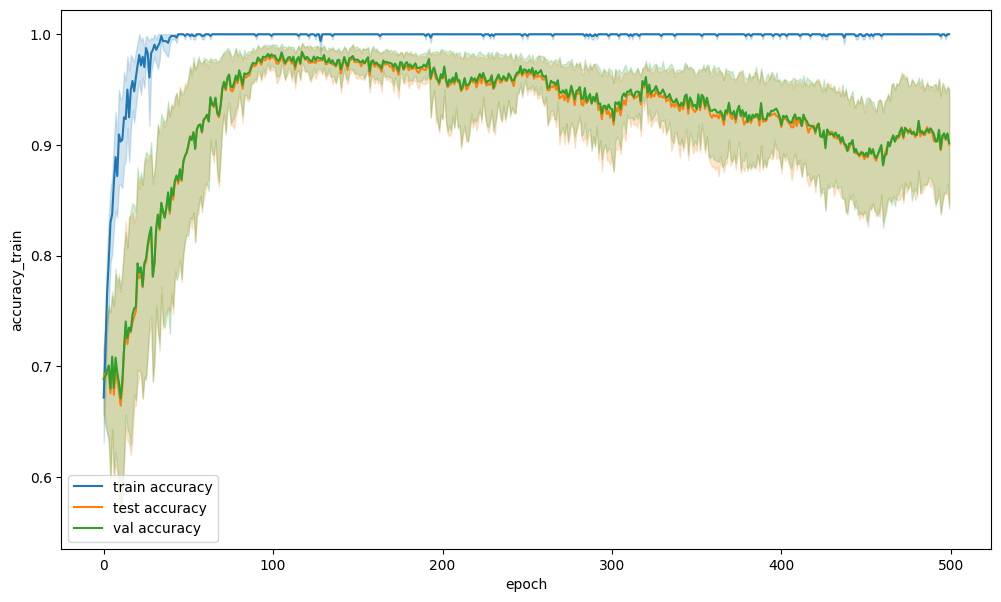

In [8]:
df_le = (
    df_results.sort_values(by=["id", "epoch"], ascending=[False, False])
    .groupby("id", as_index=False)
    .first()
)
plt.figure(figsize=(12, 7))
sns.lineplot(data=df_le, x="epoch", y="loss",label="Mesure d'erreur")
plt.savefig("Visualisation/ADDA_Visu/loss_baseline_Cell_to_Patient_500_batch_size32_L21e-3_L11e-3_noweightdecay_lr1e-4_dropout")

plt.figure(figsize=(12,7))
sns.lineplot(data=df_le, x="epoch", y="accuracy_train", label="train accuracy")
sns.lineplot(data=df_le, x="epoch", y="accuracy_test", label="test accuracy")
sns.lineplot(data=df_le, x="epoch", y="accuracy_val", label="val accuracy")
plt.savefig("Visualisation/ADDA_Visu/accuracy_baseline_Cell_to_Patient_500_batch_size32_L21e-3_L11e-3_noweightdecay_lr1e-4_dropout")

In [6]:
torch.save(baseline_net.state_dict(), "Models/baseline_Cell_to_Patient_500_batch_size32_noL2_noL1_noweightdecay_lr1e-4_dropout_var")

In [7]:
pca2D = PCA(n_components=2)

labels, domain_labels = [],[]
source_iter, target_iter = iter(cellDataloaders[0]), iter(patientDataloaders[0])
n_iters = min(len(cellDataloaders[0]), len(patientDataloaders[0]))
X_fc1 = []
handle = baseline_net.fc1.register_forward_hook(forward_hook(X_fc1))
for iter_i in range(len(source_iter)):
    source_x, source_y = next(source_iter)

    #Output des Inputs de Source et Target depuis leur Extracteur respectif
    source_output = baseline_net(source_x.view(-1,source_x.shape[1]))

    #Création des labels pour Source et Target
    #bs = source_x.size(0)
    source_label = torch.tensor([0]*source_x.size(0), dtype=torch.float).to(device)

    labels.extend(source_label.cpu().detach().numpy().tolist())
    domain_labels.extend(source_output.cpu().detach().numpy().tolist())

for iter_i in range(len(target_iter)):
    target_x, target_y = next(target_iter)

    #Output des Inputs de Source et Target depuis leur Extracteur respectif
    target_output = baseline_net(target_x.view(-1,target_x.shape[1]))

    #Création des labels pour Source et Target
    #bs = source_x.size(0)
    target_label = torch.tensor([1]*target_x.size(0), dtype=torch.float).to(device)

    labels.extend(target_label.cpu().detach().numpy().tolist())
    domain_labels.extend(target_output.cpu().detach().numpy().tolist())

In [ ]:
len(X_fc1)

In [ ]:
len(domain_labels)

In [ ]:
data_pca = pca2D.fit_transform(X_fc1)
print(pca2D.explained_variance_ratio_)

In [ ]:
scatter = plt.scatter(data_pca[:,0],data_pca[:,1],s=1,c=domain_labels)
plt.legend(handles = scatter.legend_elements()[0], labels=['Source','Target'])
plt.show()

In [ ]:
scatter = plt.scatter(data_pca[:,0],data_pca[:,1],s=1,c=labels)
plt.legend(handles = scatter.legend_elements()[0], labels=['Source','Target'])
plt.show()